In [2]:
%load_ext autoreload
%autoreload 2


import pandas as pd
from glob import glob
from os import path
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('notebook')

import time

import sys
sys.path.insert(0, path.abspath(path.join(path.curdir, '../src')))

from mythicwind.csv_io import read_frame
from mythicwind.ellipse import *

%matplotlib notebook

from IPython.display import display, Markdown, Latex

def print_md(string):
    display(Markdown(string))

def print_ltx(string):
    display(Latex(string))
    
def plot_blade_landing(helihoist, sbitroot, sbittip, first_contact, blade_landing, save_fig_path=None, ylim=(-0.1, 0.1)):

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(16,9))

    ax1.plot(helihoist.deflection, label='helihoist')
    ax1.plot(sbitroot.deflection, label='sbitroot')
    ax1.plot(sbittip.deflection, label='sbittip')
    ax1.axvline(x=blade_landing, color='tab:red', label='blade landing')
    ax1.axvline(x=first_contact, color='tab:red', linestyle='--', label='first contact')
    ax1.legend(ncol=4, loc='lower right')
    ax1.set_ylabel('deflection (m)')

    ax2.set_ylim([-0.1, 0.1])
    ax2.plot(sbitroot.deflection - helihoist.deflection, label='sbitroot - helihoist', color='tab:orange')
    ax2.axvline(x=blade_landing, color='tab:red', label='blade landing')
    ax2.axvline(x=first_contact, color='tab:red', linestyle='--', label='first contact')
    ax2.axhline(y=0, color='k')
    ax2.legend(loc='upper right', ncol=2)
    ax2.set_ylabel('deflection diff (m)')

    ax3.set_ylim([-0.1, 0.1])
    ax3.plot(sbittip.deflection - helihoist.deflection, label='sbittip - helihoist', color='tab:green')
    ax3.axvline(x=blade_landing, color='tab:red', label='blade landing')
    ax3.axvline(x=first_contact, color='tab:red', linestyle='--', label='first contact')
    ax3.axhline(y=0, color='k')
    ax3.legend(loc='upper right', ncol=2)
    ax3.set_ylabel('deflection diff (m)')

    ax4.set_ylim([-0.1, 0.1])
    ax4.plot(sbitroot.deflection - sbittip.deflection, label='sbitroot - sbittip', color='lightblue')
    ax4.axvline(x=blade_landing, color='tab:red', label='blade landing')
    ax4.axvline(x=first_contact, color='tab:red', linestyle='--', label='first contact')
    ax4.axhline(y=0, color='k')
    ax4.legend(loc='upper right', ncol=2)
    ax4.set_ylabel('deflection diff (m)')
    ax4.set_xlabel('date / time')
    
    if save_fig_path:
        fig.savefig(save_fig_path, dpi=300)
    
def plot_blade_landing_geometry(helihoist, sbitroot, sbittip, first_contact, blade_landing, resample_window='50ms', rolling_window='1min', save_fig_path=None, ylim=(-0.1, 0.1)):

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(16,9))

    ax1.plot(helihoist.max_deflection.resample(resample_window).mean().rolling(rolling_window).mean(), label='helihoist')
    ax1.plot(sbitroot.max_deflection.resample(resample_window).mean().rolling(rolling_window).mean(), label='sbitroot')
    ax1.plot(sbittip.max_deflection.resample(resample_window).mean().rolling(rolling_window).mean(), label='sbittip')
    ax1.axvline(x=blade_landing, color='tab:red', label='blade landing')
    ax1.axvline(x=first_contact, color='tab:red', linestyle='--', label='first contact')
    ax1.legend(ncol=4, loc='lower right')
    ax1.set_ylabel('deflection (m)')

    ax2.set_ylim([-0.1, 0.1])
    ax2.plot(sbitroot.max_deflection.resample(resample_window).mean().rolling(rolling_window).mean() - helihoist.max_deflection.resample(resample_window).mean().rolling(rolling_window).mean(), label='sbitroot - helihoist', color='tab:orange')
    ax2.axvline(x=blade_landing, color='tab:red', label='blade landing')
    ax2.axvline(x=first_contact, color='tab:red', linestyle='--', label='first contact')
    ax2.axhline(y=0, color='k')
    ax2.legend(loc='upper right', ncol=2)
    ax2.set_ylabel('deflection diff (m)')

    ax3.set_ylim([-0.1, 0.1])
    ax3.plot(sbittip.max_deflection.resample(resample_window).mean().rolling(rolling_window).mean() - helihoist.max_deflection.resample(resample_window).mean().rolling(rolling_window).mean(), label='sbittip - helihoist', color='tab:green')
    ax3.axvline(x=blade_landing, color='tab:red', label='blade landing')
    ax3.axvline(x=first_contact, color='tab:red', linestyle='--', label='first contact')
    ax3.axhline(y=0, color='k')
    ax3.legend(loc='upper right', ncol=2)
    ax3.set_ylabel('deflection diff (m)')

    ax4.set_ylim([-0.1, 0.1])
    ax4.plot(sbitroot.max_deflection.resample(resample_window).mean().rolling(rolling_window).mean() - sbittip.max_deflection.resample(resample_window).mean().rolling(rolling_window).mean(), label='sbitroot - sbittip', color='lightblue')
    ax4.axvline(x=blade_landing, color='tab:red', label='blade landing')
    ax4.axvline(x=first_contact, color='tab:red', linestyle='--', label='first contact')
    ax4.axhline(y=0, color='k')
    ax4.legend(loc='upper right', ncol=2)
    ax4.set_ylabel('deflection diff (m)')
    ax4.set_xlabel('date / time')
    
    if save_fig_path:
        fig.savefig(save_fig_path, dpi=300)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from pandas. import Timestamp

ModuleNotFoundError: No module named 'pandas.timestamps'

Timestamp('2019-10-15 07:05:13+0000', tz='UTC')

In [17]:
"""
turbine-08,2019-10-15 09:05,2019-10-15 10:05,00:59:55,1571123113,1571126708
turbine-08,2019-10-15 16:28,2019-10-15 17:47,01:18:50,1571149693,1571154423
turbine-08,2019-10-16 03:07,2019-10-16 04:35,01:28:24,1571188044,1571193348
"""

data_dir = '../data/turbines/turbine-08/'

sbi_delta_t = pd.to_timedelta(1, unit='h')

blade1_landing = pd.to_datetime('1571123113', unit='s', utc=True)
blade2_landing = pd.to_datetime('1571149693', unit='s', utc=True)
blade3_landing = pd.to_datetime('1571188044', unit='s', utc=True)

blade1_start = blade1_landing - sbi_delta_t
blade1_end = blade1_landing + sbi_delta_t

blade2_start = blade2_landing - sbi_delta_t
blade2_end = blade2_landing + sbi_delta_t

blade3_start = blade3_landing - sbi_delta_t
blade3_end = blade3_landing + sbi_delta_t

In [38]:
data = defaultdict(list)
for pos in ('helihoist-1', 'sbittip', 'sbitroot'):
    pos_dir = path.join(data_dir, pos)
    if path.isdir(pos_dir):
        print(f'\n\nprocessing {pos_dir}')
        pos_data = path.join(pos_dir, 'tom/acc-vel-pos')
        if path.isdir(pos_data):
            for tomfile in sorted(glob(path.join(pos_data, '*.csv'))):                
                # parse the date of the file first
                #t_start = tomfile.split('/')[-1].split('_')[4]
                #t_stop = tomfile.split('/')[-1].split('_')[5].split('.')[0]
                
                file_start = pd.to_datetime(tomfile.split('/')[-1].split('_')[4], format='%Y-%m-%d-%H-%M-%S', utc=True)
                file_end = pd.to_datetime(tomfile.split('/')[-1].split('_')[5].split('.')[0], format='%Y-%m-%d-%H-%M-%S', utc=True)
                
                if file_start > start:
                    if file_start < stop:
                        print(f'found file {tomfile}')
                        data[pos].append(read_frame(tomfile))

helihoist = pd.concat(data['helihoist-1'])
sbitroot = pd.concat(data['sbitroot'])
sbittip = pd.concat(data['sbittip'])
del(data)



processing ../data/turbines/turbine-08/helihoist-1
found file ../data/turbines/turbine-08/helihoist-1/tom/acc-vel-pos/turbine-08_helihoist-1_tom_acc-vel-pos_2019-10-14-07-55-52_2019-10-14-08-22-37.csv
found file ../data/turbines/turbine-08/helihoist-1/tom/acc-vel-pos/turbine-08_helihoist-1_tom_acc-vel-pos_2019-10-14-08-22-37_2019-10-14-08-48-41.csv
found file ../data/turbines/turbine-08/helihoist-1/tom/acc-vel-pos/turbine-08_helihoist-1_tom_acc-vel-pos_2019-10-14-08-48-41_2019-10-14-09-13-49.csv
found file ../data/turbines/turbine-08/helihoist-1/tom/acc-vel-pos/turbine-08_helihoist-1_tom_acc-vel-pos_2019-10-14-09-13-49_2019-10-14-09-39-00.csv
found file ../data/turbines/turbine-08/helihoist-1/tom/acc-vel-pos/turbine-08_helihoist-1_tom_acc-vel-pos_2019-10-14-09-39-00_2019-10-14-10-04-14.csv
found file ../data/turbines/turbine-08/helihoist-1/tom/acc-vel-pos/turbine-08_helihoist-1_tom_acc-vel-pos_2019-10-14-10-04-14_2019-10-14-10-29-29.csv
found file ../data/turbines/turbine-08/helihois

found file ../data/turbines/turbine-08/sbitroot/tom/acc-vel-pos/turbine-08_sbitroot_tom_acc-vel-pos_2019-10-14-14-09-28_2019-10-14-14-36-40.csv
found file ../data/turbines/turbine-08/sbitroot/tom/acc-vel-pos/turbine-08_sbitroot_tom_acc-vel-pos_2019-10-14-14-36-40_2019-10-14-15-03-53.csv
found file ../data/turbines/turbine-08/sbitroot/tom/acc-vel-pos/turbine-08_sbitroot_tom_acc-vel-pos_2019-10-14-15-03-53_2019-10-14-15-31-14.csv
found file ../data/turbines/turbine-08/sbitroot/tom/acc-vel-pos/turbine-08_sbitroot_tom_acc-vel-pos_2019-10-14-15-31-14_2019-10-14-15-58-38.csv
found file ../data/turbines/turbine-08/sbitroot/tom/acc-vel-pos/turbine-08_sbitroot_tom_acc-vel-pos_2019-10-14-15-58-38_2019-10-14-16-26-02.csv
found file ../data/turbines/turbine-08/sbitroot/tom/acc-vel-pos/turbine-08_sbitroot_tom_acc-vel-pos_2019-10-14-16-26-02_2019-10-14-16-53-24.csv
found file ../data/turbines/turbine-08/sbitroot/tom/acc-vel-pos/turbine-08_sbitroot_tom_acc-vel-pos_2019-10-14-16-53-24_2019-10-14-17-20

In [39]:
helihoist_geometry_df = geometry_analysis(helihoist)
sbittip_geometry_df = geometry_analysis(sbittip)
sbitroot_geometry_df = geometry_analysis(sbitroot)

omitting last element
viewing plane normal vector: [ 0.       0.      -0.08698]
viewing plane normal vector: [-0.        0.        0.034749]
omitting last element
viewing plane normal vector: [0.       0.       0.042016]


<IPython.core.display.Javascript object>


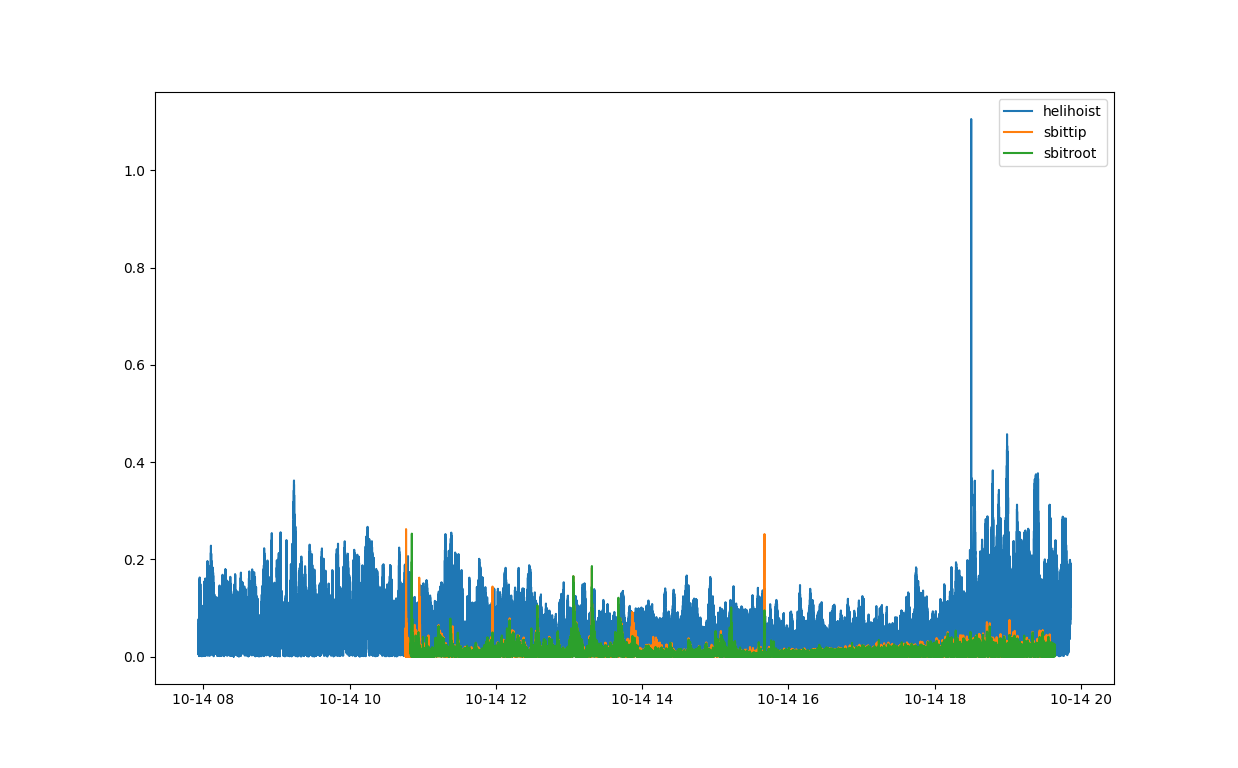

In [40]:
plt.figure()
plt.plot(helihoist.deflection, label='helihoist')
plt.plot(sbittip.deflection, label='sbittip')
plt.plot(sbitroot.deflection, label='sbitroot')
plt.legend()

<IPython.core.display.Javascript object>


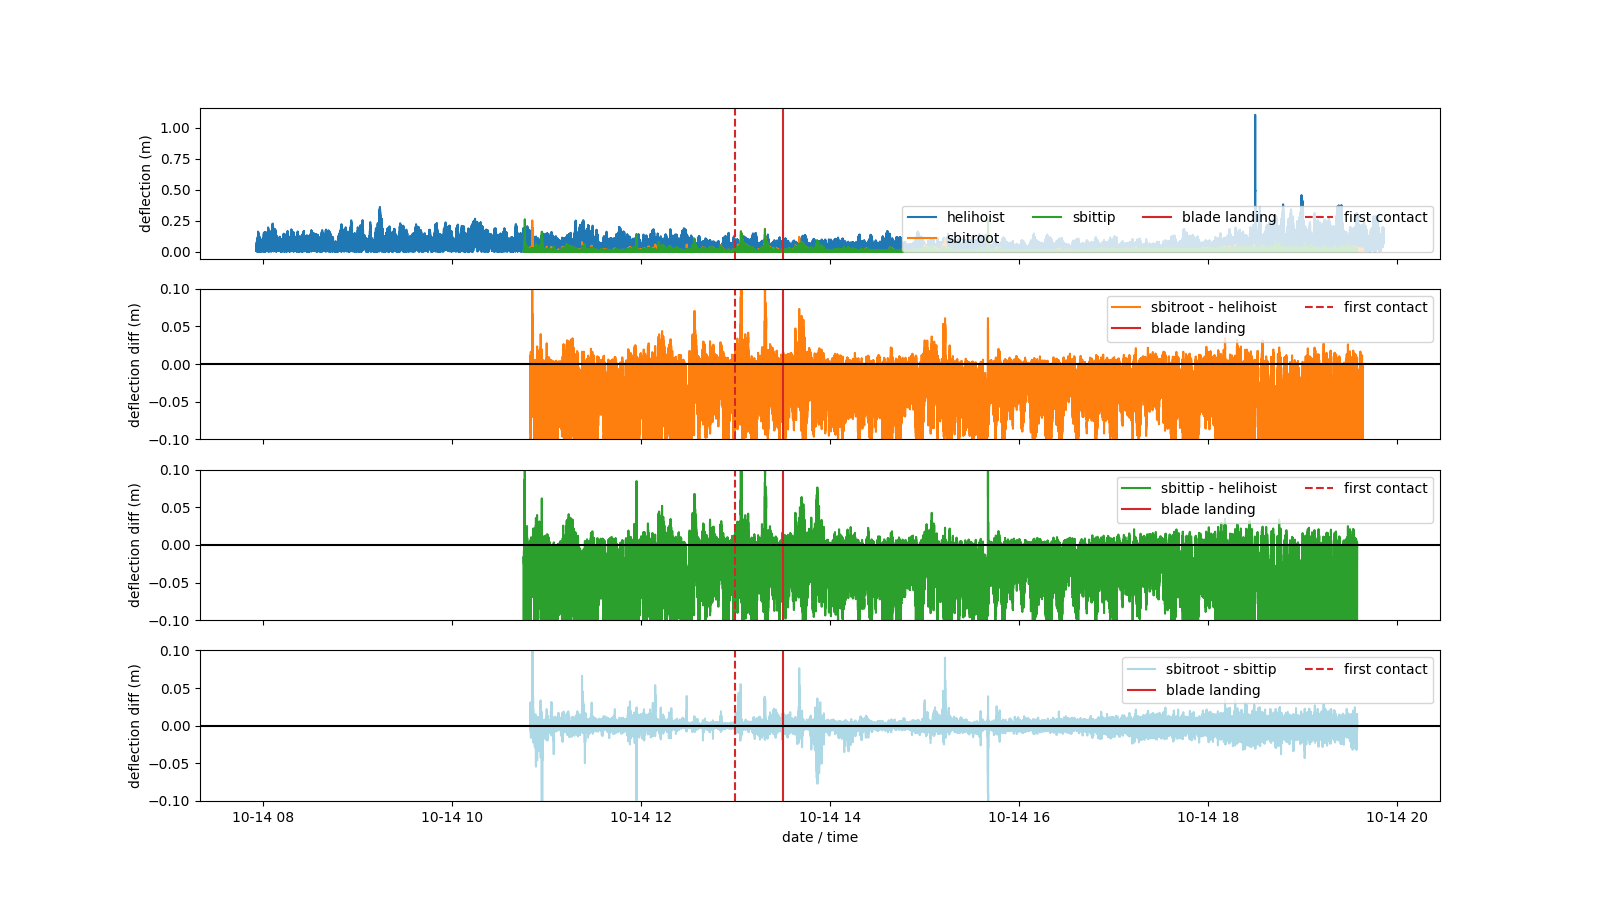

In [43]:
plot_blade_landing(helihoist=helihoist, sbitroot=sbitroot, sbittip=sbittip, first_contact=first_contact, blade_landing=blade_landing, save_fig_path='../results/turbine-08/deflections-bladelanding.png')

<IPython.core.display.Javascript object>


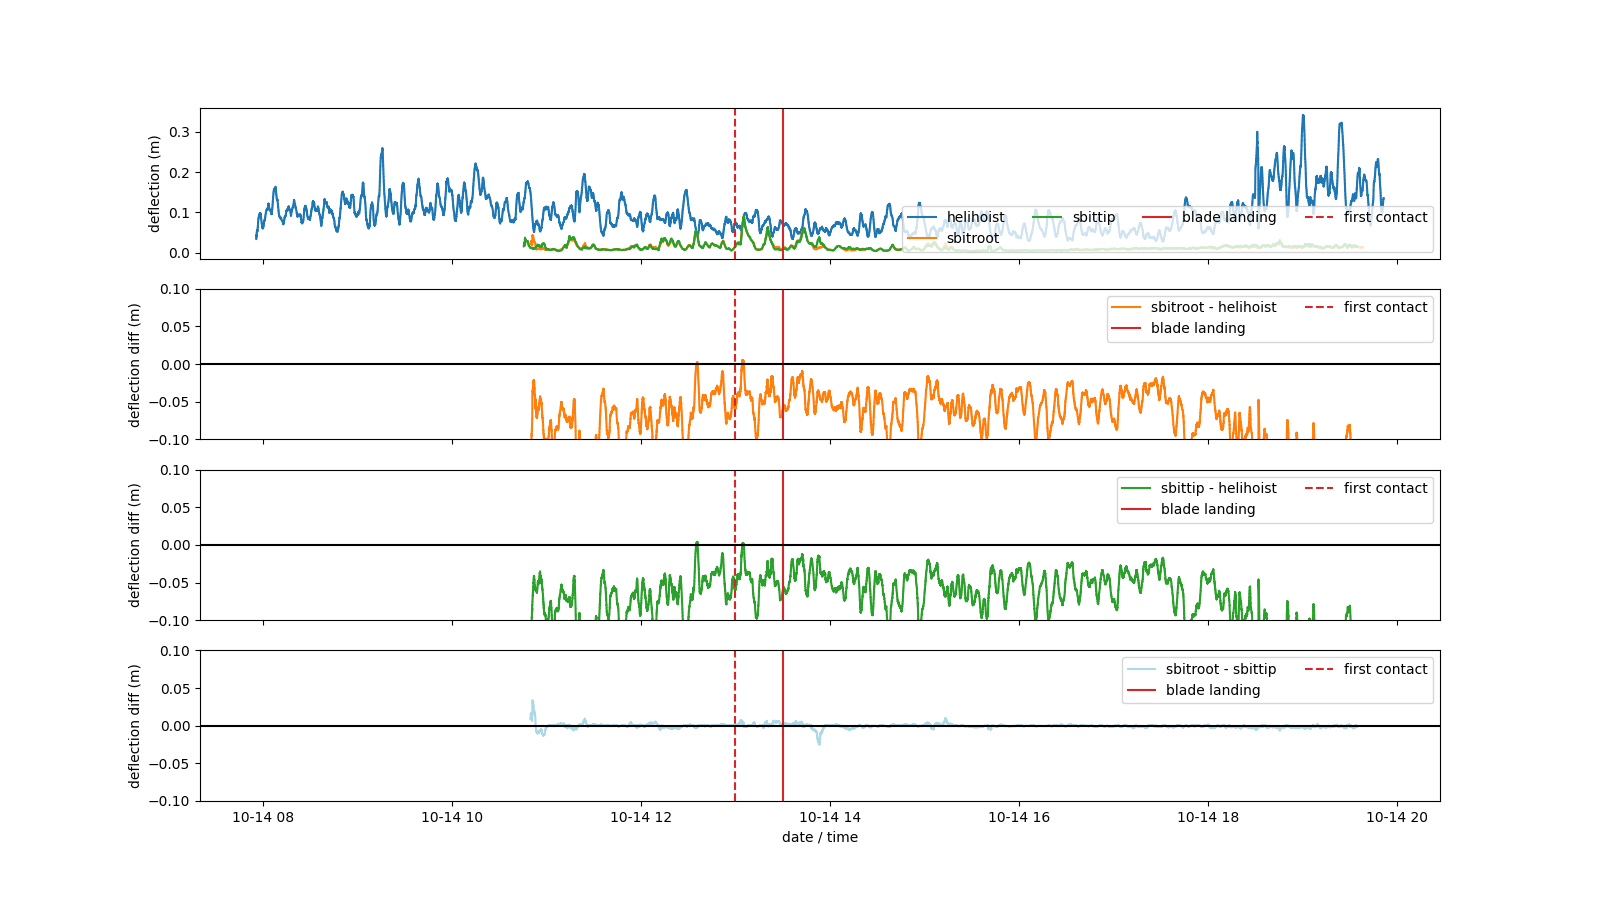

In [44]:
plot_blade_landing_geometry(helihoist=helihoist_geometry_df, sbitroot=sbitroot_geometry_df, sbittip=sbittip_geometry_df, first_contact=first_contact, blade_landing=blade_landing, resample_window='33ms', rolling_window='2min', save_fig_path='../results/turbine-08/deflections-bladelanding-smooth.png')

<IPython.core.display.Javascript object>


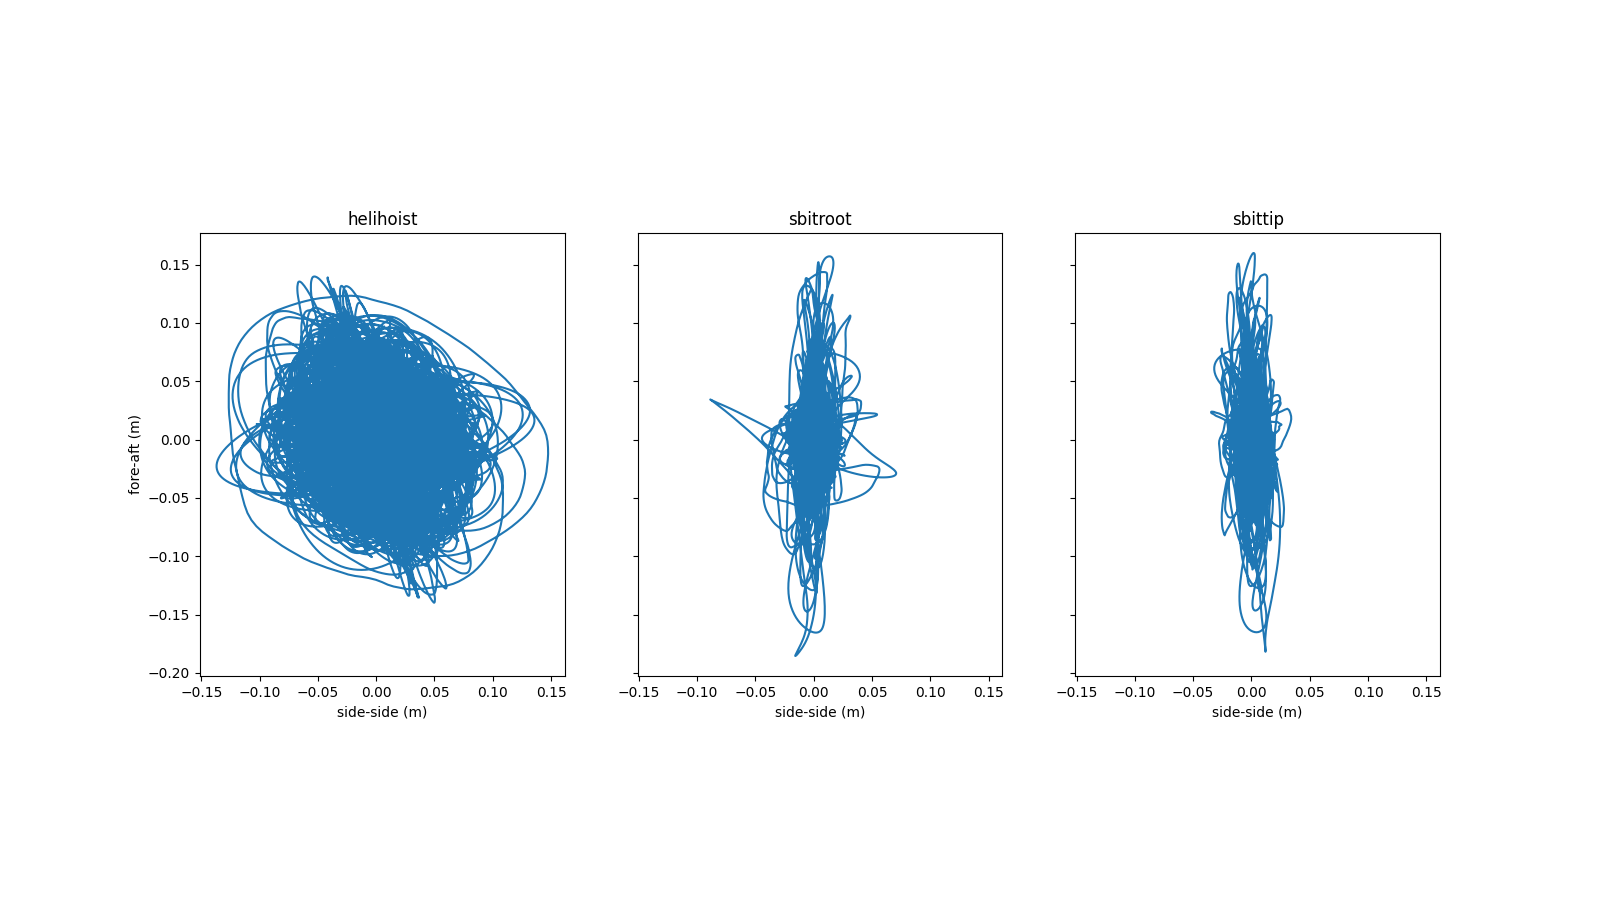

In [45]:
t1 = blade_landing - pd.to_timedelta(1, unit='hour')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(16,9))
ax1.set_aspect('equal', 'box')
ax1.set_title('helihoist')
ax1.set_ylabel('fore-aft (m)')
ax1.set_xlabel('side-side (m)')
ax1.plot(helihoist[first_contact:blade_landing].pos_z, helihoist[first_contact:blade_landing].pos_x)
ax2.set_aspect('equal', 'box')
ax2.set_title('sbitroot')
ax2.set_xlabel('side-side (m)')
ax2.plot(sbitroot[first_contact:blade_landing].pos_z, sbitroot[first_contact:blade_landing].pos_x)
ax3.set_aspect('equal', 'box')
ax3.set_title('sbittip')
ax3.set_xlabel('side-side (m)')
ax3.plot(sbittip[first_contact:blade_landing].pos_z, sbittip[first_contact:blade_landing].pos_x)
fig.savefig('../results/turbine-12/turbine-12_bladelanding_orbits.png', dpi=300)

## Orbit Ellipses

<IPython.core.display.Javascript object>


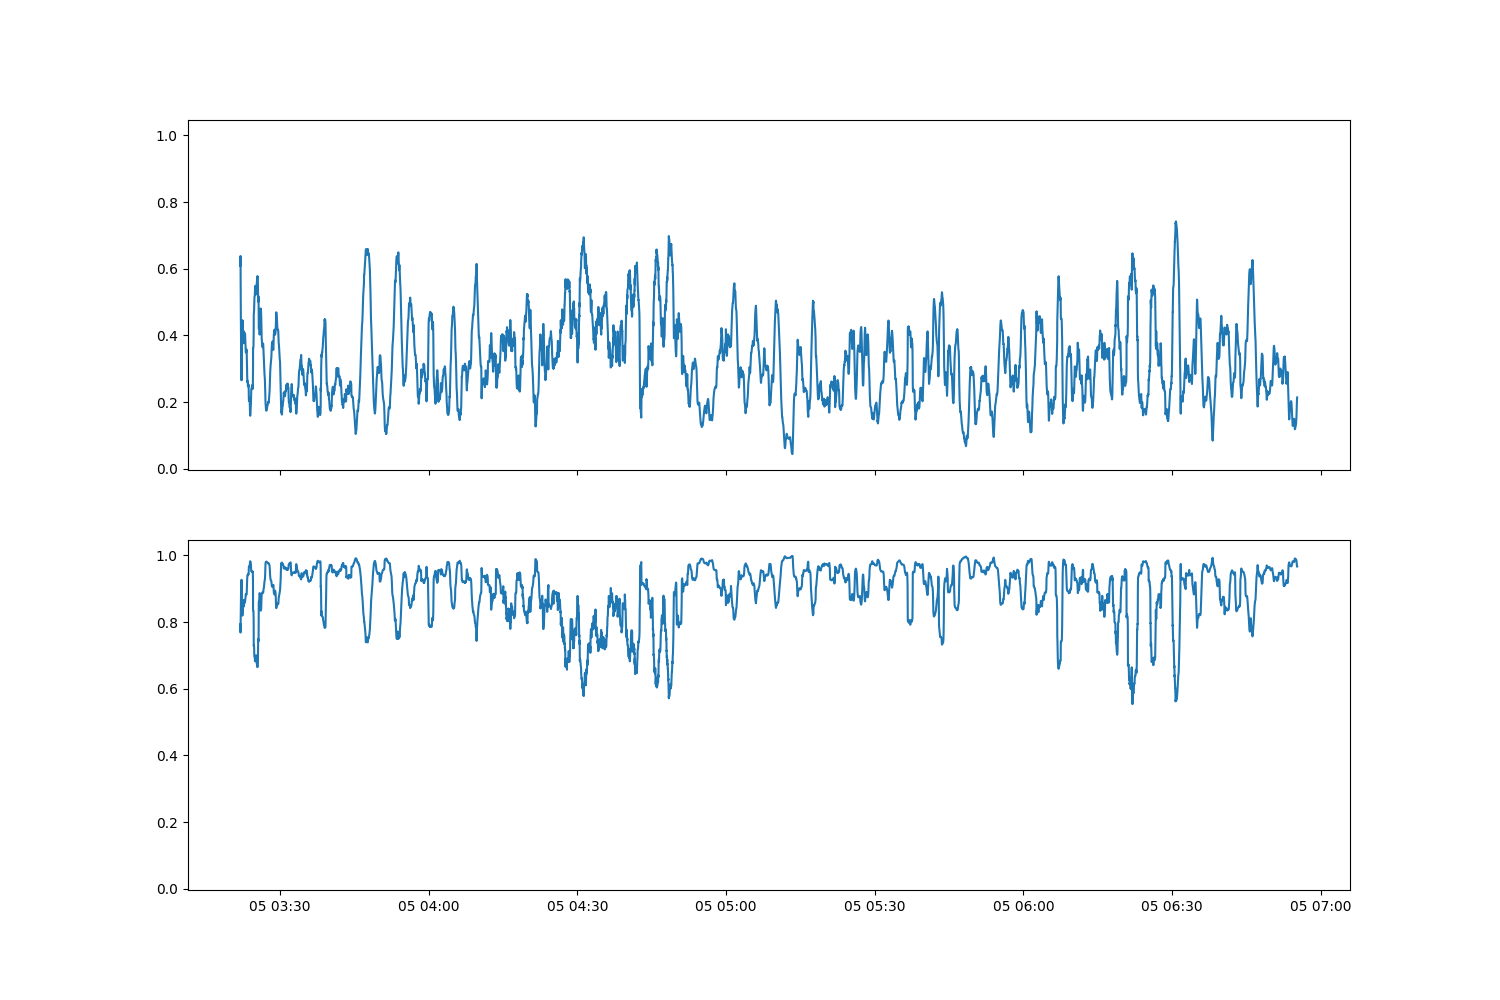

In [78]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(15, 10))
ax1.plot(helihoist_geometry_df.axis_ratio.rolling('1min').mean())
ax2.plot(helihoist_geometry_df.eccentricity.rolling('1min').mean())


<IPython.core.display.Javascript object>


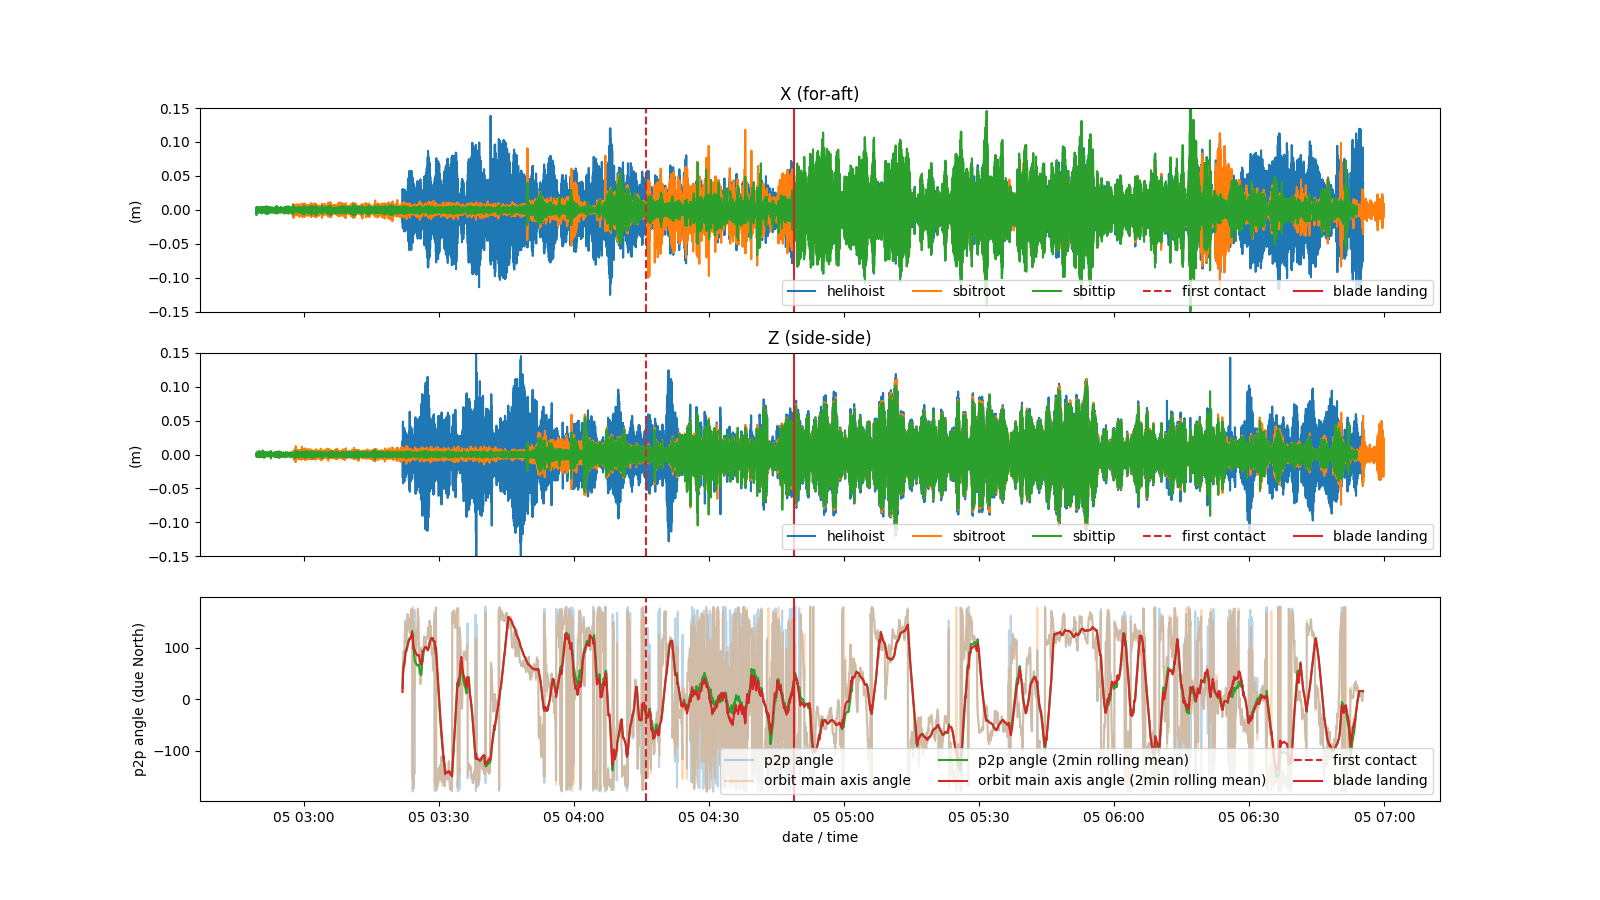

In [104]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(16, 9))

ax1.plot(helihoist.pos_x, label='helihoist')
ax1.plot(sbitroot.pos_x, label='sbitroot')
ax1.plot(sbittip.pos_x, label='sbittip')
ax1.axvline(x=first_contact, color='tab:red', linestyle='--', label='first contact')
ax1.axvline(x=blade_landing, color='tab:red', label='blade landing')
ax1.set_title('X (for-aft)')
ax1.set_ylim([-0.15, 0.15])
ax1.set_ylabel('(m)')
ax1.legend(ncol=5, loc='lower right')

ax2.plot(helihoist.pos_z, label='helihoist')
ax2.plot(sbitroot.pos_z, label='sbitroot')
ax2.plot(sbittip.pos_z, label='sbittip')
ax2.axvline(x=first_contact, color='tab:red', linestyle='--', label='first contact')
ax2.axvline(x=blade_landing, color='tab:red', label='blade landing')
ax2.set_title('Z (side-side)')
ax2.set_ylim([-0.15, 0.15])
ax2.set_ylabel('(m)')
ax2.legend(ncol=5, loc='lower right')


ax3.plot(helihoist_geometry_df.p2p_angle, alpha=0.3, label='p2p angle')
ax3.plot(helihoist_geometry_df.axis_angle[::2], alpha=0.3, label='orbit main axis angle')
ax3.plot(helihoist_geometry_df.p2p_angle.rolling('2min').mean(), label='p2p angle (2min rolling mean)')
ax3.plot(helihoist_geometry_df.axis_angle[::2].rolling('2min').mean(), label='orbit main axis angle (2min rolling mean)')
ax3.axvline(x=first_contact, color='tab:red', linestyle='--', label='first contact')
ax3.axvline(x=blade_landing, color='tab:red', label='blade landing')
ax3.set_ylabel('p2p angle (due North)')
ax3.legend(ncol=3, loc='lower right')
ax3.set_xlabel('date / time')

fig.savefig('../results/turbine-12/directionality.png', dpi=300)

## Distribution of data prior to blade landing

In [62]:
t1 = blade_landing - pd.to_timedelta(1, unit='h')
t2 = blade_landing

<IPython.core.display.Javascript object>


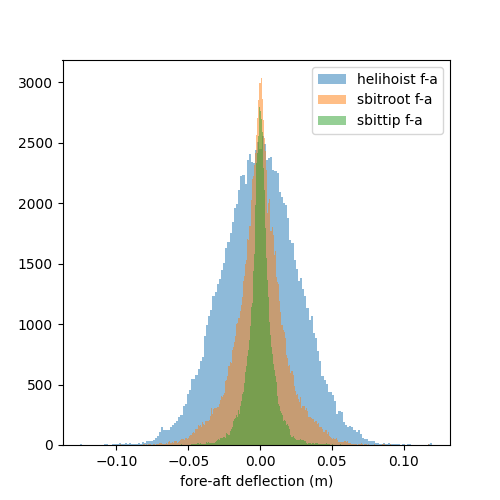

In [98]:
N = len(helihoist.pos_x)

plt.figure(figsize=(5,5))
plt.hist(helihoist.pos_x[t1:t2], bins='fd', alpha=0.5, label='helihoist f-a')
plt.hist(sbitroot.pos_x[t1:t2], bins='fd', alpha=0.5, label='sbitroot f-a')
plt.hist(sbittip.pos_x[t1:t2], bins='fd', alpha=0.5, label='sbittip f-a')
plt.legend()
plt.xlabel('fore-aft deflection (m)')
plt.savefig('../results/turbine-12/fore-aft_deflection-distribution.png', dpi=300)

<IPython.core.display.Javascript object>


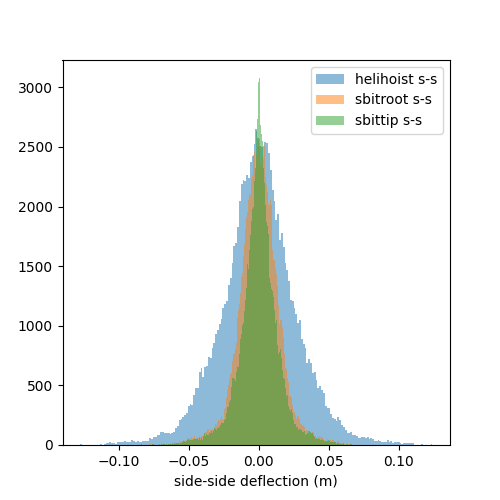

In [97]:
plt.figure(figsize=(5,5))
plt.hist(helihoist.pos_z[t1:t2], bins='fd', alpha=0.5, label='helihoist s-s')
plt.hist(sbitroot.pos_z[t1:t2], bins='fd', alpha=0.5, label='sbitroot s-s')
plt.hist(sbittip.pos_z[t1:t2], bins='fd', alpha=0.5, label='sbittip s-s')
plt.legend()
plt.xlabel('side-side deflection (m)')
plt.savefig('../results/turbine-12/side-side_deflection-distribution.png', dpi=300)

<IPython.core.display.Javascript object>


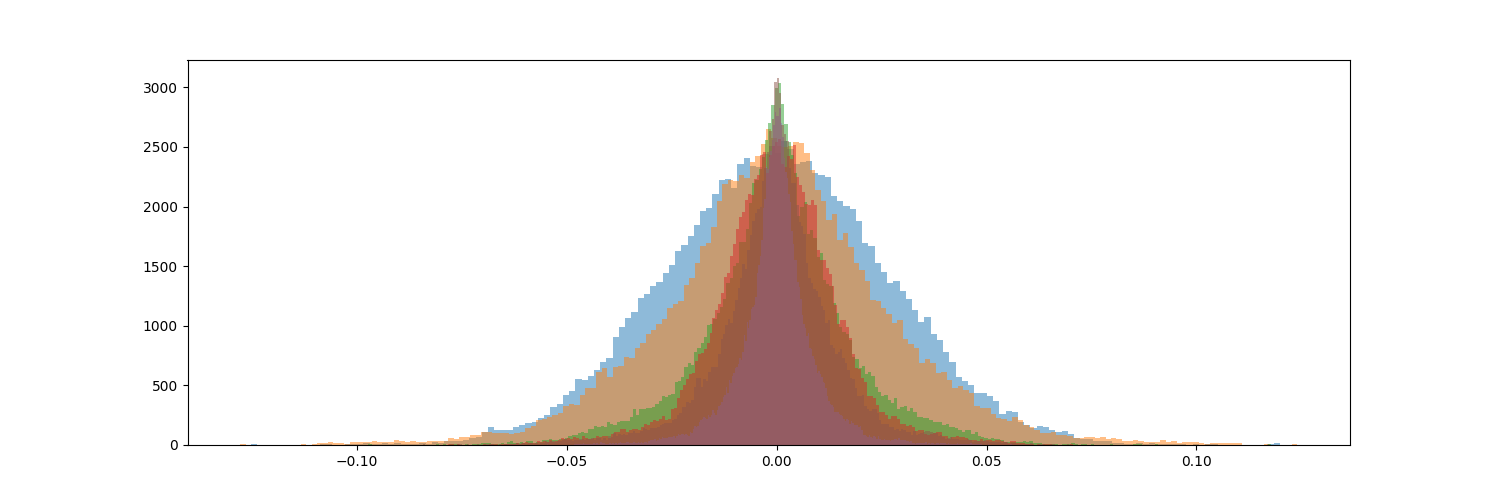

''

In [66]:
plt.figure()
plt.hist(helihoist.pos_x[t1:t2], bins='fd', alpha=0.5)
plt.hist(helihoist.pos_z[t1:t2], bins='fd', alpha=0.5)
plt.hist(sbitroot.pos_x[t1:t2], bins='fd', alpha=0.5)
plt.hist(sbitroot.pos_z[t1:t2], bins='fd', alpha=0.5)
plt.hist(sbittip.pos_x[t1:t2], bins='fd', alpha=0.5)
plt.hist(sbittip.pos_z[t1:t2], bins='fd', alpha=0.5)
;

<IPython.core.display.Javascript object>


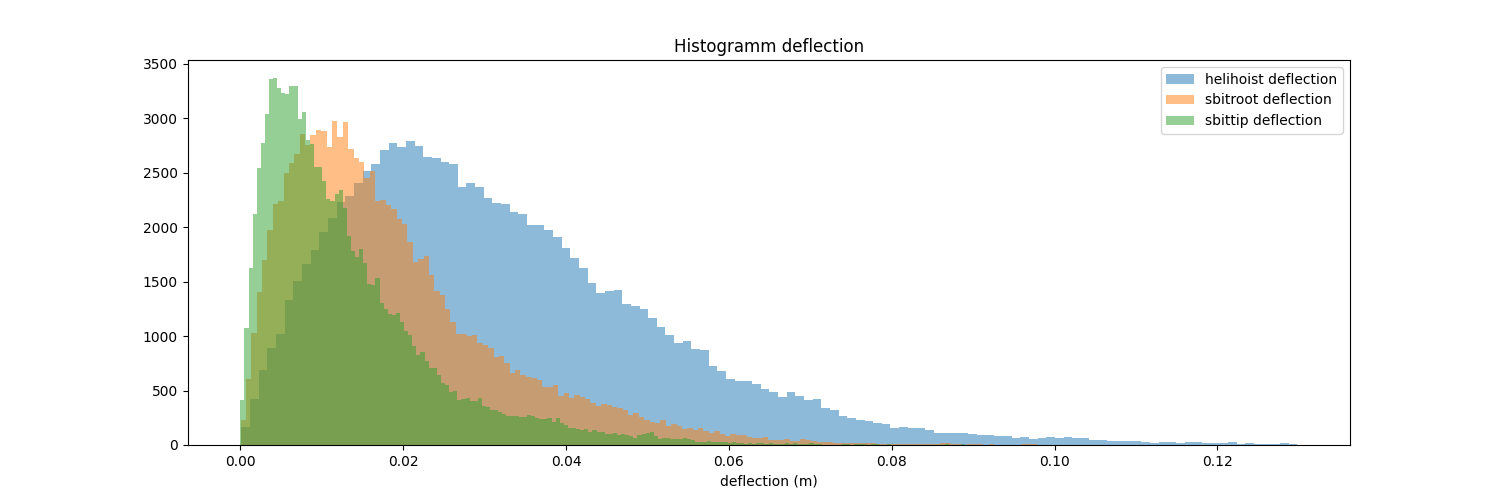

In [99]:
plt.figure()
plt.title('Histogramm deflection')
plt.hist(helihoist.deflection[t1:t2], bins='fd', alpha=0.5, label='helihoist deflection')
plt.hist(sbitroot.deflection[t1:t2], bins='fd', alpha=0.5, label='sbitroot deflection')
plt.hist(sbittip.deflection[t1:t2], bins='fd', alpha=0.5, label='sbittip deflection')
plt.xlabel('deflection (m)')
plt.legend()
plt.savefig('../results/turbine-12/deflection-distribution.png', dpi=300)

<IPython.core.display.Javascript object>


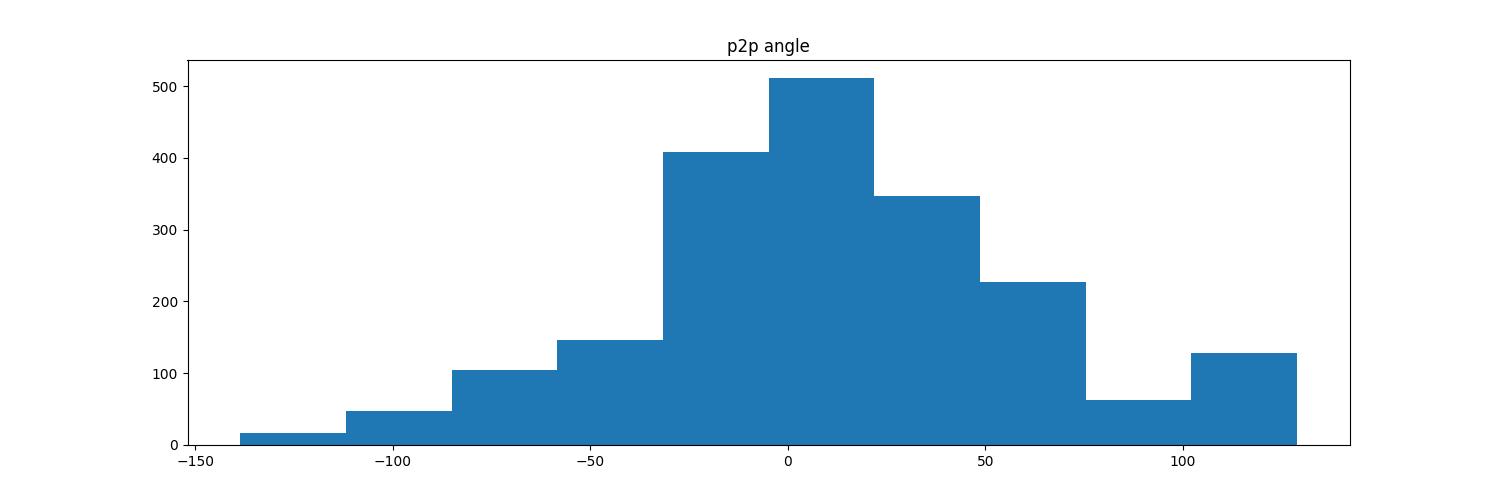

<IPython.core.display.Javascript object>


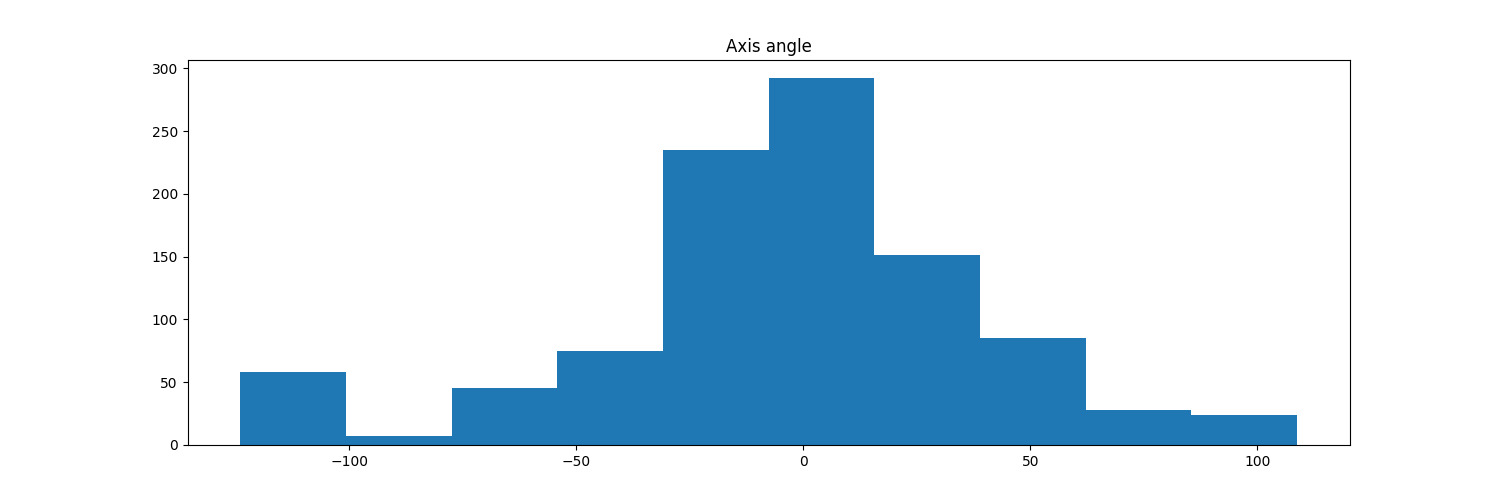

(array([ 58.,   7.,  45.,  75., 235., 292., 151.,  85.,  28.,  24.]),
 array([-123.96986136, -100.69502891,  -77.42019647,  -54.14536402,
         -30.87053158,   -7.59569913,   15.67913331,   38.95396576,
          62.2287982 ,   85.50363065,  108.77846309]),
 <a list of 10 Patch objects>)

In [71]:
plt.figure()
plt.title('p2p angle')
plt.hist(helihoist_geometry_df[t1:t2].p2p_angle.rolling('2min').mean())
plt.figure()
plt.title('Axis angle')
plt.hist(helihoist_geometry_df[t1:t2].axis_angle[::2].rolling('2min').mean())